# PACKAGE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# DATA

In [ ]:
train_path = '/kaggle/input/datavers/train_cleaned.csv'

In [ ]:
data_train = pd.read_csv(train_path)

In [ ]:
data_train['hour'] = data_train['hour'].astype(float)
data_train['day'] = data_train['day'].astype(float)
data_train['month'] = data_train['month'].astype(float)
data_train['hour_maintenance'] = data_train['hour_maintenance'].astype(float)
data_train['day_maintenance'] = data_train['day_maintenance'].astype(float)
data_train['month_maintenance'] = data_train['month_maintenance'].astype(float)
data_train['month_distance'] = data_train['month_distance'].astype(float)

In [ ]:
data_train.head()

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,end_month,time_of_day,average_temperature,temperature_range,average_voltage,average_current,average_RPM,total_RPM,average_vibration,total_vibration
0,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,51.354324,427.396277,295.878727,...,0,1,121.151429,459.641816,306.306985,57.775493,3827.521658,15310.086631,38.411903,76.823806
1,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,30.374734,432.705017,270.634005,...,0,3,538.562070,1765.932156,300.425196,59.023950,3985.376165,15941.504658,34.564163,69.128326
2,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,28.297122,435.504998,274.241212,...,0,1,223.819680,558.269472,302.825123,60.837411,3387.498950,13549.995801,39.842275,79.684550
3,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,28.524163,436.427583,270.492020,...,0,1,512.061859,2324.997161,300.700787,57.740275,3442.113605,13768.454419,37.850330,75.700660
4,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,50.104089,436.557558,270.068438,...,0,3,213.562389,516.926092,300.133045,60.618562,3415.934086,13663.736343,35.385172,70.770345


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429841 entries, 0 to 429840
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   temperature_10H_max (°C)  429841 non-null  float64
 1   temperature_10H_min (°C)  429841 non-null  float64
 2   temperature-1             429841 non-null  float64
 3   temperature-2             429841 non-null  float64
 4   temperature-3             429841 non-null  float64
 5   apparent_temperature_max  429841 non-null  float64
 6   apparent_temperature_min  429841 non-null  float64
 7   humidity                  429841 non-null  float64
 8   Voltage-L                 429841 non-null  float64
 9   Voltage-R                 429841 non-null  float64
 10  Voltage-M                 429841 non-null  float64
 11  Current-M                 429841 non-null  float64
 12  Current-R                 429841 non-null  float64
 13  Current-T                 429841 non-null  f

In [ ]:
data_train['Status'].value_counts()

Status
0    264014
1     84339
2     81488
Name: count, dtype: int64

In [ ]:
data_train['Priority'].value_counts()

Priority
0    162780
1    150458
2    116603
Name: count, dtype: int64

In [ ]:
# One-hot encoding untuk kolom 'Country Machine'
onehot_encoded_country = pd.get_dummies(data_train['Country Machine'], prefix='Country_Machine')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_country = onehot_encoded_country.astype(int)

# One-hot encoding untuk kolom 'Status Sparepart'
onehot_encoded_status_sparepart = pd.get_dummies(data_train['Status Sparepart'], prefix='Status_Sparepart')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_status_sparepart = onehot_encoded_status_sparepart.astype(int)

# One-hot encoding untuk kolom 'Priority'
onehot_encoded_priority = pd.get_dummies(data_train['Priority'], prefix='Priority')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_priority = onehot_encoded_priority.astype(int)

# Gabungkan hasil one-hot encoding ke data_train
data_train_encoded = pd.concat([data_train, onehot_encoded_country, onehot_encoded_status_sparepart, onehot_encoded_priority], axis=1)

# Hapus kolom asli 'Country Machine' dan 'Status Sparepart' (opsional)
data_train_encoded.drop(columns=['Country Machine', 'Status Sparepart', 'Priority'], inplace=True)

In [ ]:
data_train_encoded.head()

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_1,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_0,Priority_1,Priority_2
0,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,51.354324,427.396277,295.878727,...,0,0,0,0,1,0,0,0,0,1
1,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,30.374734,432.705017,270.634005,...,1,0,0,0,0,0,1,0,0,1
2,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,28.297122,435.504998,274.241212,...,1,0,1,0,0,0,0,0,1,0
3,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,28.524163,436.427583,270.492020,...,0,1,0,0,0,0,0,1,0,0
4,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,50.104089,436.557558,270.068438,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
data_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429841 entries, 0 to 429840
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   temperature_10H_max (°C)  429841 non-null  float64
 1   temperature_10H_min (°C)  429841 non-null  float64
 2   temperature-1             429841 non-null  float64
 3   temperature-2             429841 non-null  float64
 4   temperature-3             429841 non-null  float64
 5   apparent_temperature_max  429841 non-null  float64
 6   apparent_temperature_min  429841 non-null  float64
 7   humidity                  429841 non-null  float64
 8   Voltage-L                 429841 non-null  float64
 9   Voltage-R                 429841 non-null  float64
 10  Voltage-M                 429841 non-null  float64
 11  Current-M                 429841 non-null  float64
 12  Current-R                 429841 non-null  float64
 13  Current-T                 429841 non-null  f

# FEATURE SELECTION

- undersampling
- scaling (numerik)

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
columns_drop = ['Status', 'Area']

In [ ]:
X = data_train_encoded.drop(columns=columns_drop)
y = data_train_encoded['Status']

In [ ]:
# Pilih kolom dengan tipe float
float_columns = X.select_dtypes(include=['float64']).columns

# Inisialisasi Robust Scaler
scaler = RobustScaler()
X[float_columns] = scaler.fit_transform(X[float_columns])

In [ ]:
X.head()

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_1,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_0,Priority_1,Priority_2
0,-0.382206,-0.240577,-1.041132,-0.183239,-0.516357,-0.774638,-0.234122,1.350235,-0.274065,0.401441,...,0,0,0,0,1,0,0,0,0,1
1,3.367675,0.594653,-0.739489,0.499191,3.703510,0.729295,0.228925,-0.547624,0.085736,-0.483498,...,1,0,0,0,0,0,1,0,0,1
2,-0.109958,-0.280094,1.144220,0.496819,-0.168345,-0.496767,0.173007,-0.735570,0.275505,-0.357049,...,1,0,1,0,0,0,0,0,1,0
3,4.778868,-0.874577,-1.312651,-0.053340,0.628865,0.907062,-1.127002,-0.715031,0.338033,-0.488475,...,0,1,0,0,0,0,0,1,0,0
4,-0.201037,-0.046192,1.015141,0.185218,-0.168121,-0.163832,0.286999,1.237136,0.346842,-0.503323,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((343872, 55), (85969, 55))

In [ ]:
y_train.shape, y_test.shape

((343872,), (85969,))

In [ ]:
# Melihat jumlah sampel per kelas
print(y_train.value_counts())

Status
0    211368
1     67476
2     65028
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Inisialisasi undersampler untuk kelas 0
undersampler = RandomUnderSampler(sampling_strategy={0: 100000}, random_state=42)

# Inisialisasi oversampler untuk kelas 1 dan 2
oversampler = RandomOverSampler(sampling_strategy={1: 100000, 2: 100000}, random_state=42)

In [ ]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
X_train_final, y_train_final = oversampler.fit_resample(X_train_resampled, y_train_resampled)

In [ ]:
from collections import Counter

print("Distribusi kelas setelah resampling:", Counter(y_train_final))

Distribusi kelas setelah resampling: Counter({0: 100000, 1: 100000, 2: 100000})


### Feature importance of random forest classifier

In [ ]:
# sel = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
# sel.fit(X_train_final, y_train_final)
# sel.get_support()

In [ ]:
# X_train_final.columns

In [ ]:
# features = X_train_final.columns[sel.get_support()]

In [ ]:
# features

In [ ]:
# len(features)

In [ ]:
# sel.estimator_.feature_importances_

### LASSO

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Inisialisasi model Lasso (Logistic Regression dengan L1 Regularization)
lasso = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', random_state=42)

# Fit model
lasso.fit(X_train_final, y_train_final)

LogisticRegression(multi_class='multinomial', penalty='l1', random_state=42,
                   solver='saga')

In [ ]:
# Seleksi fitur
selector = SelectFromModel(lasso, threshold='mean', max_features=30)
X_train_lasso = selector.transform(X_train_final)

# Menampilkan fitur terpilih
selected_features = X_train_final.columns[selector.get_support()]
print("Fitur terpilih dengan Lasso:")
print(selected_features)

Fitur terpilih dengan Lasso:
Index(['temperature-2', 'apparent_temperature_max', 'apparent_temperature_min',
       'Voltage-M', 'RPM', 'Power', 'Power_Backup', 'Age', 'hour', 'day',
       'day_maintenance', 'month_maintenance', 'weekend', 'end_month',
       'time_of_day', 'Country_Machine_1', 'Country_Machine_2',
       'Country_Machine_4', 'Status_Sparepart_0', 'Status_Sparepart_2',
       'Status_Sparepart_3', 'Status_Sparepart_4', 'Status_Sparepart_5',
       'Priority_1', 'Priority_2'],
      dtype='object')


In [ ]:
# # Gabungkan fitur yang relevan
# combined_features = list(set(features).union(set(selected_features)))

# # Menampilkan fitur terpilih
# print("Fitur Terpilih Gabungan:")
# print(combined_features)

In [ ]:
selected_column = ['temperature-2', 'apparent_temperature_max', 'apparent_temperature_min',
       'Voltage-M', 'RPM', 'Power', 'Power_Backup', 'Age', 'hour', 'day',
       'day_maintenance', 'month_maintenance', 'weekend', 'end_month',
       'time_of_day', 'Country_Machine_1', 'Country_Machine_2',
       'Country_Machine_4', 'Status_Sparepart_0', 'Status_Sparepart_2',
       'Status_Sparepart_3', 'Status_Sparepart_4', 'Status_Sparepart_5',
       'Priority_1', 'Priority_2']

In [ ]:
X_train_new = X_train_final[selected_column]

In [ ]:
# X_train_new = X_train_new.drop(columns=['Voltage-R', 'temperature_10H_max (°C)',
#                                        'Vibration-2', 'temperature_range'])

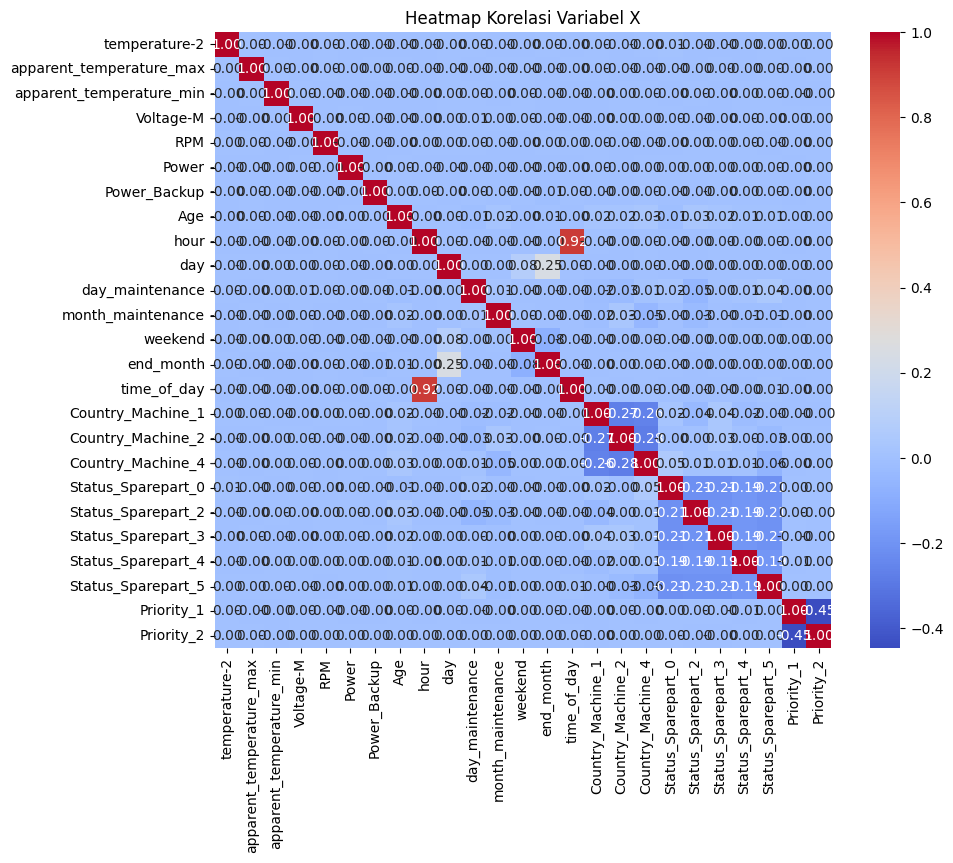

In [ ]:
# Hitung matriks korelasi
correlation_matrix = X_train_new.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap Korelasi Variabel X")
plt.show()

In [ ]:
X_test_new = X_test[selected_column]

In [ ]:
# X_test_new = X_test_new.drop(columns=['Voltage-R', 'temperature_10H_max (°C)',
#                                        'Vibration-2', 'temperature_range'])

# MODELLING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train_new.head()

,temperature-2,apparent_temperature_max,apparent_temperature_min,Voltage-M,RPM,Power,Power_Backup,Age,hour,day,...,Country_Machine_1,Country_Machine_2,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_1,Priority_2
0,0.321196,1.426375,0.051795,0.120778,-0.578670,0.121730,0,0.5,0.416667,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,-0.112103,0.182619,0.069560,-0.966324,-0.669051,1.442601,0,0.5,-0.416667,0.866667,...,0,1,0,0,0,1,0,0,0,0
2,0.349120,-0.008061,0.244572,-0.373175,0.164497,-0.155345,0,0.0,0.500000,-0.400000,...,1,0,0,0,0,0,0,0,0,0
3,-0.217375,0.360891,0.664109,-0.041518,-0.357871,-0.663427,1,0.3,1.000000,0.133333,...,0,0,0,0,0,1,0,0,0,0
4,0.175480,0.803522,0.395546,0.172740,1.050208,0.380521,0,0.7,0.166667,0.000000,...,0,0,0,1,0,0,0,0,0,1


### Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression dengan regularisasi L1 (Lasso)
lasso = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', random_state=42)

# Fit model pada data training
lasso.fit(X_train_new, y_train_final)

LogisticRegression(multi_class='multinomial', penalty='l1', random_state=42,
                   solver='saga')

In [ ]:
# Prediksi pada data test
y_pred_rl = lasso.predict(X_test_new)

# Evaluasi menggunakan classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rl, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.6139    0.3518    0.4472     52646
           1     0.1976    0.3523    0.2531     16863
           2     0.1907    0.2981    0.2326     16460

    accuracy                         0.3416     85969
   macro avg     0.3340    0.3340    0.3110     85969
weighted avg     0.4512    0.3416    0.3681     85969



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_new, y_train_final)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Prediksi
y_pred_dt = dt.predict(X_test_new)

# Evaluasi
print("Classification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt, digits=4))

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0     0.6111    0.4214    0.4988     52646
           1     0.1940    0.2903    0.2326     16863
           2     0.1894    0.2812    0.2264     16460

    accuracy                         0.3688     85969
   macro avg     0.3315    0.3310    0.3192     85969
weighted avg     0.4485    0.3688    0.3944     85969



### Random Forest

In [ ]:
# Model Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=400, n_jobs=-1)
rf.fit(X_train_new, y_train_final)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_new)

# Evaluasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.6129    0.8733    0.7203     52646
           1     0.1891    0.0708    0.1030     16863
           2     0.1995    0.0563    0.0878     16460

    accuracy                         0.5595     85969
   macro avg     0.3338    0.3335    0.3037     85969
weighted avg     0.4506    0.5595    0.4781     85969



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_new, y_train_final)

KNeighborsClassifier()

In [ ]:
# Prediksi
y_pred_knn = knn_model.predict(X_test_new)

# Evaluasi
print("Classification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn, digits=4))

Classification Report (KNN):

              precision    recall  f1-score   support

           0     0.6116    0.4186    0.4970     52646
           1     0.1957    0.3291    0.2455     16863
           2     0.1869    0.2450    0.2120     16460

    accuracy                         0.3678     85969
   macro avg     0.3314    0.3309    0.3181     85969
weighted avg     0.4487    0.3678    0.3931     85969



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Model AdaBoost dengan Decision Tree sebagai base estimator
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        n_estimators=200,
                        random_state=42)
ab.fit(X_train_new, y_train_final)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200, random_state=42)

In [ ]:
# Prediksi
y_pred_ab = ab.predict(X_test_new)

# Evaluasi
print("Classification Report (AdaBoost):\n")
print(classification_report(y_test, y_pred_ab, digits=4))

Classification Report (AdaBoost):

              precision    recall  f1-score   support

           0     0.6124    0.3108    0.4123     52646
           1     0.1959    0.3459    0.2502     16863
           2     0.1924    0.3447    0.2469     16460

    accuracy                         0.3241     85969
   macro avg     0.3336    0.3338    0.3031     85969
weighted avg     0.4503    0.3241    0.3488     85969



### XG Boost

In [ ]:
from xgboost import XGBClassifier

# Model XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_new, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Prediksi
y_pred_xgb = xgb.predict(X_test_new)

# Evaluasi
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb, digits=4))

Classification Report (XGBoost):

              precision    recall  f1-score   support

           0     0.6090    0.2999    0.4019     52646
           1     0.1974    0.3624    0.2556     16863
           2     0.1915    0.3384    0.2446     16460

    accuracy                         0.3196     85969
   macro avg     0.3326    0.3336    0.3007     85969
weighted avg     0.4483    0.3196    0.3431     85969



### CatBoost

In [ ]:
from catboost import CatBoostClassifier

# Model CatBoost
catboost = CatBoostClassifier(
    iterations=200,              # Jumlah iterasi (estimators)
    learning_rate=0.01,          # Learning rate
    depth=6,                     # Kedalaman pohon
    random_state=42,             # Seed untuk hasil yang dapat direproduksi
    loss_function='MultiClass',  # Fungsi loss untuk klasifikasi multikelas
    verbose=0                   # Menampilkan log setiap 50 iterasi
)

# Melatih model
catboost.fit(X_train_new, y_train_final)

In [ ]:
# Prediksi
y_pred_catboost = catboost.predict(X_test_new)

# Evaluasi
print("Classification Report (CatBoost):\n")
print(classification_report(y_test, y_pred_catboost, digits=4))

Classification Report (CatBoost):

              precision    recall  f1-score   support

           0     0.6104    0.3116    0.4126     52646
           1     0.1956    0.3690    0.2557     16863
           2     0.1906    0.3159    0.2377     16460

    accuracy                         0.3237     85969
   macro avg     0.3322    0.3322    0.3020     85969
weighted avg     0.4487    0.3237    0.3483     85969



# PREDICT

In [ ]:
test_path = '/kaggle/input/preprocessing-test-baru/test_cleaned.csv'

In [ ]:
data_test = pd.read_csv(test_path)

In [ ]:
data_test['hour'] = data_test['hour'].astype(float)
data_test['day'] = data_test['day'].astype(float)
data_test['month'] = data_test['month'].astype(float)
data_test['hour_maintenance'] = data_test['hour_maintenance'].astype(float)
data_test['day_maintenance'] = data_test['day_maintenance'].astype(float)
data_test['month_maintenance'] = data_test['month_maintenance'].astype(float)
data_test['month_distance'] = data_test['month_distance'].astype(float)

In [ ]:
data_test.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,end_month,time_of_day,average_temperature,temperature_range,average_voltage,average_current,average_RPM,total_RPM,average_vibration,total_vibration
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689,-221.677374,166.922400,48.626853,166.131089,13.669606,-43.911657,2023-01-14 10:51:00,33.920209,...,0,1,-632.464144,-3100.646316,319.303972,55.163469,3463.711497,13854.845987,42.085064,84.170129
1,TRX8fc5889e25fbf66b21063d165228745f,719.700365,-22.696733,400.678538,14.421425,53.740342,22.297932,-36.569152,2024-01-10 14:02:00,38.730079,...,0,2,233.168787,742.397098,300.563673,57.102251,2782.404178,11129.616713,39.427549,78.855097
2,TRX5c56664724a974cf6c87bd2659fd7046,718.918630,23.645588,456.535206,39.053999,16.800056,24.194078,-19.180181,2024-03-04 12:41:00,32.308273,...,0,2,250.990696,695.273042,305.189807,61.854076,3769.035896,15076.143583,32.186239,64.372477
3,TRX85fe42a5737897b7649a24fede27e90f,593.678709,19.380103,300.119375,7.974228,118.629967,14.245905,-28.569977,2024-11-20 06:47:00,28.081321,...,0,1,207.956476,574.298606,312.008196,59.110460,3014.720483,12058.881931,36.256552,72.513104
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.119485,27.352616,600.000000,56.588644,5.298174,31.684072,-24.182661,2024-03-17 01:39:00,33.968450,...,0,1,266.671784,616.766869,291.723588,62.732743,3988.719091,15954.876363,39.689510,79.379020


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 48 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  float64
 2   temperature_10H_min (°C)  float64
 3   temperature-1             float64
 4   temperature-2             float64
 5   temperature-3             float64
 6   apparent_temperature_max  float64
 7   apparent_temperature_min  float64
 8   timestamp                 object 
 9   humidity                  float64
 10  Voltage-L                 float64
 11  Voltage-R                 float64
 12  Voltage-M                 float64
 13  Current-M                 float64
 14  Current-R                 float64
 15  Current-T                 float64
 16  RPM                       float64
 17  RPM-1                     float64
 18  RPM-2                     float64
 19  RPM-3                     float64
 20  Vibration-1             

In [ ]:
# One-hot encoding untuk kolom 'Country Machine'
onehot_encoded_country = pd.get_dummies(data_test['Country Machine'], prefix='Country_Machine')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_country = onehot_encoded_country.astype(int)

# One-hot encoding untuk kolom 'Status Sparepart'
onehot_encoded_status_sparepart = pd.get_dummies(data_test['Status Sparepart'], prefix='Status_Sparepart')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_status_sparepart = onehot_encoded_status_sparepart.astype(int)

# One-hot encoding untuk kolom 'Priority'
onehot_encoded_priority = pd.get_dummies(data_test['Priority'], prefix='Priority')

# Pastikan nilai True/False diubah menjadi 1/0
onehot_encoded_priority = onehot_encoded_priority.astype(int)

# Gabungkan hasil one-hot encoding ke data_train
data_test_encoded = pd.concat([data_test, onehot_encoded_country, onehot_encoded_status_sparepart, onehot_encoded_priority], axis=1)

# Hapus kolom asli 'Country Machine' dan 'Status Sparepart' (opsional)
data_test_encoded.drop(columns=['Country Machine', 'Status Sparepart', 'Priority'], inplace=True)

In [ ]:
data_test_encoded.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_1,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_0,Priority_1,Priority_2
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689,-221.677374,166.922400,48.626853,166.131089,13.669606,-43.911657,2023-01-14 10:51:00,33.920209,...,0,0,0,1,0,0,0,0,0,1
1,TRX8fc5889e25fbf66b21063d165228745f,719.700365,-22.696733,400.678538,14.421425,53.740342,22.297932,-36.569152,2024-01-10 14:02:00,38.730079,...,0,0,0,0,0,0,1,0,1,0
2,TRX5c56664724a974cf6c87bd2659fd7046,718.918630,23.645588,456.535206,39.053999,16.800056,24.194078,-19.180181,2024-03-04 12:41:00,32.308273,...,0,0,0,1,0,0,0,0,1,0
3,TRX85fe42a5737897b7649a24fede27e90f,593.678709,19.380103,300.119375,7.974228,118.629967,14.245905,-28.569977,2024-11-20 06:47:00,28.081321,...,0,0,0,1,0,0,0,0,1,0
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.119485,27.352616,600.000000,56.588644,5.298174,31.684072,-24.182661,2024-03-17 01:39:00,33.968450,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
data_test_encoded.drop(columns=['Area', 'ID_Transaction',
                                'Last Maintenance', 'timestamp'], inplace=True)

In [ ]:
# Pilih kolom dengan tipe float pada data_test_encoded untuk scaling
float_columns = data_test_encoded.select_dtypes(include=['float64']).columns

# Inisialisasi Robust Scaler
scaler = RobustScaler()

# Terapkan Min-Max Scaling ke data_test_encoded
data_test_encoded[float_columns] = scaler.fit_transform(data_test_encoded[float_columns])

In [ ]:
data_test_encoded.head()

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_1,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_0,Priority_1,Priority_2
0,-11.060963,-5.081819,-0.797853,0.976752,0.538098,-0.593043,-0.762127,-0.239612,0.040908,1.656418,...,0,0,0,1,0,0,0,0,0,1
1,0.338136,-0.745479,0.728178,-0.579868,-0.294082,-0.205992,-0.426886,0.200661,0.025316,-0.376970,...,0,0,0,0,0,0,1,0,1,0
2,0.335932,0.264448,1.092827,0.541111,-0.567601,-0.120935,0.367053,-0.387161,-0.221919,0.125027,...,0,0,0,1,0,0,0,0,1,0
3,-0.017263,0.171491,0.071698,-0.873267,0.186383,-0.567191,-0.061663,-0.774077,0.071690,0.818984,...,0,0,0,1,0,0,0,0,1,0
4,0.124987,0.345235,2.029409,1.339077,-0.652765,0.215052,0.138652,-0.235196,-1.132003,-0.925657,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Fitur yang dipilih
selected_features = ['temperature-2', 'apparent_temperature_max', 'apparent_temperature_min',
       'Voltage-M', 'RPM', 'Power', 'Power_Backup', 'Age', 'hour', 'day',
       'day_maintenance', 'month_maintenance', 'weekend', 'end_month',
       'time_of_day', 'Country_Machine_1', 'Country_Machine_2',
       'Country_Machine_4', 'Status_Sparepart_0', 'Status_Sparepart_2',
       'Status_Sparepart_3', 'Status_Sparepart_4', 'Status_Sparepart_5',
       'Priority_1', 'Priority_2']

# Subset data dengan fitur yang dipilih
test_selected = data_test_encoded[selected_features]

In [ ]:
test_selected.head()

,temperature-2,apparent_temperature_max,apparent_temperature_min,Voltage-M,RPM,Power,Power_Backup,Age,hour,day,...,Country_Machine_1,Country_Machine_2,Country_Machine_4,Status_Sparepart_0,Status_Sparepart_2,Status_Sparepart_3,Status_Sparepart_4,Status_Sparepart_5,Priority_1,Priority_2
0,0.976752,-0.593043,-0.762127,0.088494,0.546219,0.274839,1,0.730446,-0.083333,-0.133333,...,0,1,0,0,1,0,0,0,0,1
1,-0.579868,-0.205992,-0.426886,-0.877410,-0.462248,0.046749,1,1.105446,0.250000,-0.400000,...,0,0,0,0,0,0,0,1,1,0
2,0.541111,-0.120935,0.367053,0.725619,0.555400,0.977224,1,0.855446,0.083333,-0.800000,...,0,0,0,0,1,0,0,0,1,0
3,-0.873267,-0.567191,-0.061663,-0.009303,-0.354467,-0.715561,1,-0.019554,-0.416667,0.266667,...,0,0,0,0,1,0,0,0,1,0
4,1.339077,0.215052,0.138652,0.630989,0.850585,0.657174,0,0.355446,-0.833333,0.066667,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
print(test_selected.isnull().sum())

temperature-2               0
apparent_temperature_max    0
apparent_temperature_min    0
Voltage-M                   0
RPM                         0
Power                       0
Power_Backup                0
Age                         0
hour                        0
day                         0
day_maintenance             0
month_maintenance           0
weekend                     0
end_month                   0
time_of_day                 0
Country_Machine_1           0
Country_Machine_2           0
Country_Machine_4           0
Status_Sparepart_0          0
Status_Sparepart_2          0
Status_Sparepart_3          0
Status_Sparepart_4          0
Status_Sparepart_5          0
Priority_1                  0
Priority_2                  0
dtype: int64


In [ ]:
y_test_pred = rf.predict(test_selected)

In [ ]:
# Ganti hasil prediksi (0, 1, 2) menjadi kategori yang lebih jelas
prediction_map = {0: 'Normal', 1: 'Warning', 2: 'Breakdown'}
y_test_pred_category = [prediction_map[val] for val in y_test_pred]

In [ ]:
hasil_prediksi = pd.DataFrame({
    'ID_Transaction': data_test['ID_Transaction'],
    'Status': y_test_pred_category
})

In [ ]:
hasil_prediksi.head()

,ID_Transaction,Status
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,Normal
1,TRX8fc5889e25fbf66b21063d165228745f,Normal
2,TRX5c56664724a974cf6c87bd2659fd7046,Normal
3,TRX85fe42a5737897b7649a24fede27e90f,Normal
4,TRX16fae83f3c8c66fb15f088e7da7713ee,Normal


In [ ]:
hasil_prediksi['Status'].value_counts()

Status
Normal       6139656
Warning       481010
Breakdown     379334
Name: count, dtype: int64

In [ ]:
hasil_prediksi.to_csv('/kaggle/working/submission_0.4775.csv', index=False)